In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'/home/manpreetdhingra1996'

In [3]:
#Load data as dataframe
data=pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    284315
1       492
Name: Class, dtype: int64

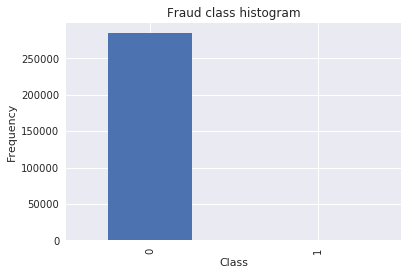

In [4]:
pd.value_counts(data['Class']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
data['Class'].value_counts()

In [5]:
#normalising data except time and class columns
data2= (data.iloc[:,1:-1] - data.iloc[:,1:-1].mean()) / (data.iloc[:,1:-1].max() - data.iloc[:,1:-1].min())
data2['Class']=data['Class']

#Converting time in seconds to hours 
data2['Hour'] = data['Time'] //3600
data2['Hour'].replace(-0,0,inplace=True)
data=data2
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,-0.023101,-0.000768,0.043951,0.061092,-0.002278,0.004649,0.001460,0.001059,0.012532,0.001878,...,0.012961,-0.001641,0.009019,0.007215,-0.030892,0.002465,-0.000427,0.002385,0,0.0
1,0.020248,0.002808,0.002885,0.019866,0.000404,-0.000828,-0.000480,0.000913,-0.008799,-0.003455,...,-0.029794,0.001504,-0.045794,0.009384,0.020565,-0.000166,0.000299,-0.003334,0,0.0
2,-0.023077,-0.014141,0.030727,0.016835,-0.003388,0.018102,0.004822,0.002657,-0.052177,0.004296,...,0.035999,0.013506,-0.092880,-0.018391,-0.022721,-0.001022,-0.001213,0.011300,0,0.0
3,-0.016416,-0.001954,0.031070,-0.038269,-0.000069,0.012539,0.001448,0.004049,-0.047781,-0.001137,...,0.000246,-0.002826,-0.158408,0.036339,-0.036252,0.001158,0.001247,0.001368,0,0.0
4,-0.019677,0.009261,0.026837,0.017866,-0.002741,0.000964,0.003612,-0.002902,0.028170,0.015581,...,0.037240,-0.002041,0.019036,-0.011564,0.082048,0.004050,0.004366,-0.000715,0,0.0


In [6]:
#SMOTE

In [7]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
def do_smote(data):
    names=list(data)
    y_t = data.Class
    X_t = data.drop('Class', axis=1)
    X_t, y_t = smt.fit_sample(X_t, y_t)
    #np.bincount(y_t)
    X=pd.DataFrame(X_t)
    X['Class']=y_t
    X.columns = names
    return X

In [8]:
smoted_data=do_smote(data)

In [9]:
##Visualize

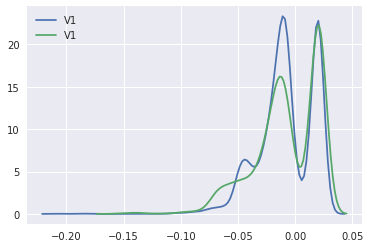

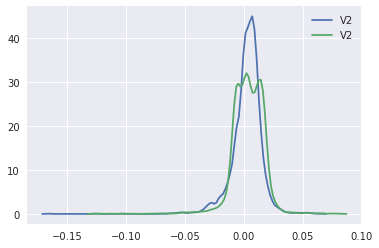

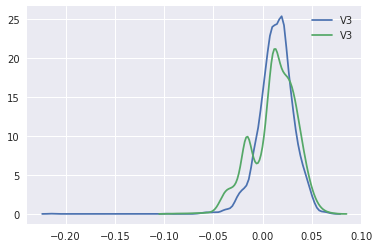

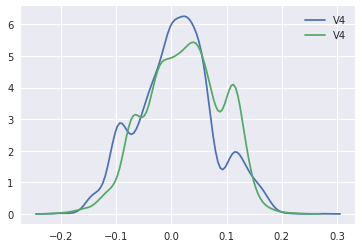

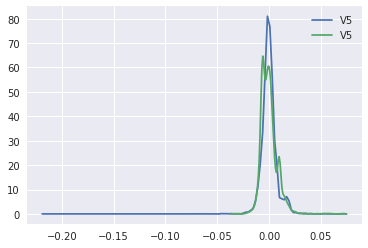

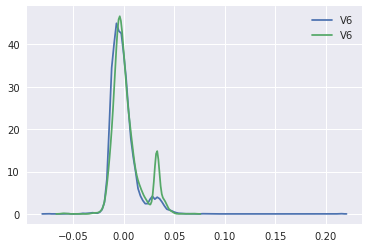

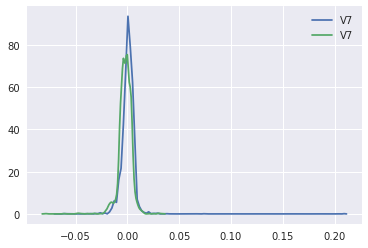

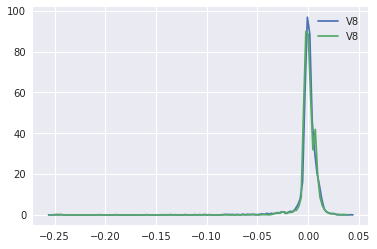

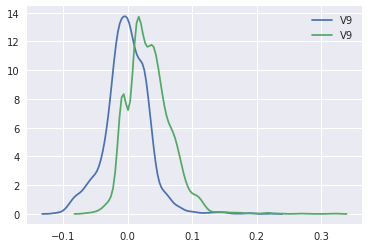

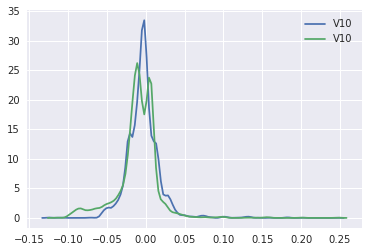

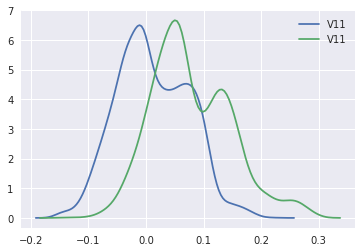

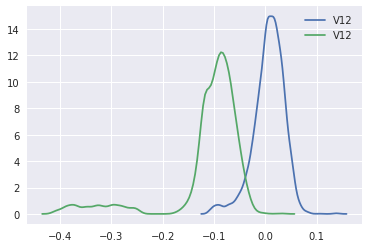

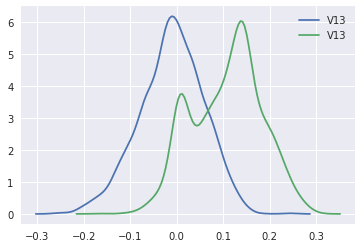

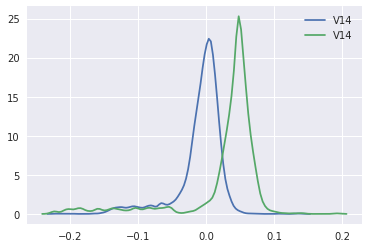

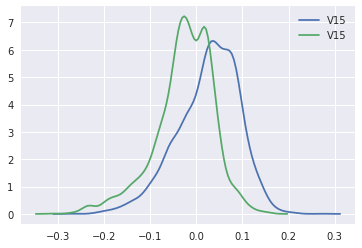

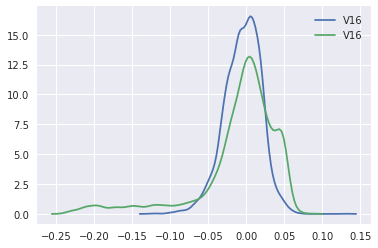

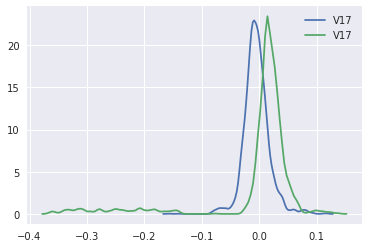

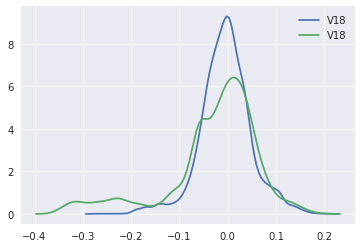

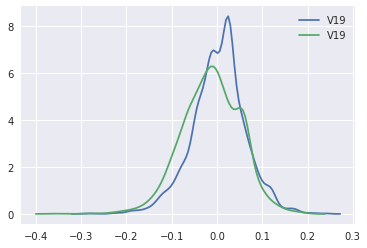

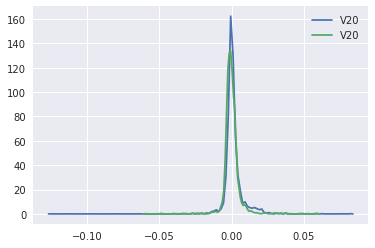

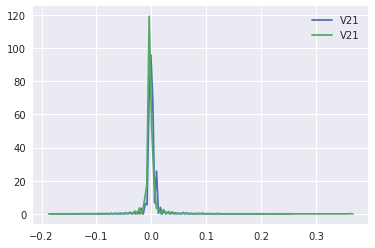

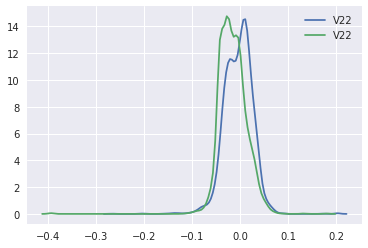

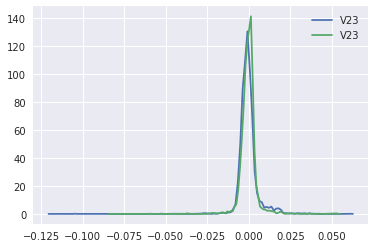

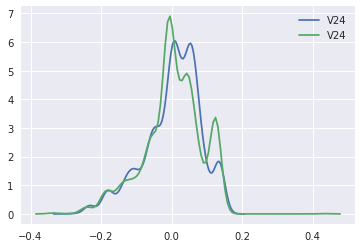

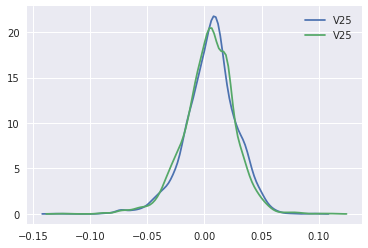

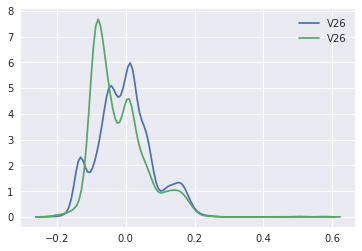

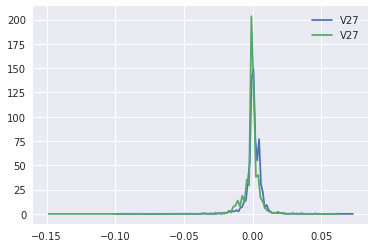

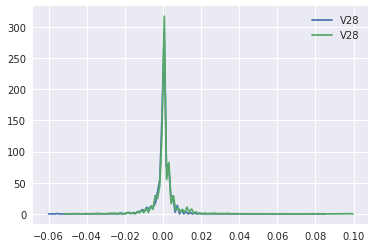

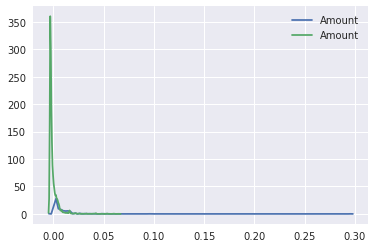

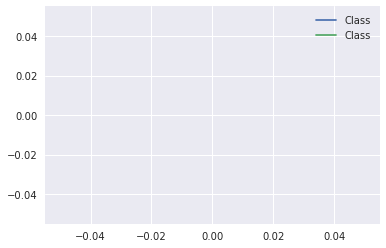

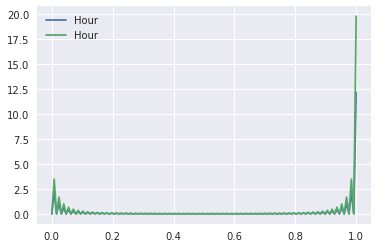

In [10]:
for j in list(smoted_data):
    for i in range(2):
        sns.kdeplot(smoted_data[smoted_data.Class==i][j])
    plt.show()

In [11]:
keep=['V1','V2','V3','V4','V5','V7','V9','V10','V11','V12','V14','V16','V17','V18','V19','V21','V26','Amount','Hour','Class']

In [12]:
data=data[keep]

In [13]:
data.head()


,V1,V2,V3,V4,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,V26,Amount,Hour,Class
0,-0.023101,-0.000768,0.043951,0.061092,-0.002278,0.001460,0.012532,0.001878,-0.032801,-0.023285,-0.010463,-0.014959,0.006043,0.001774,0.031548,-0.000295,-0.030892,0.002385,0.0,0
1,0.020248,0.002808,0.002885,0.019866,0.000404,-0.000480,-0.008799,-0.003455,0.095902,0.040149,-0.004834,0.014753,-0.003336,-0.012611,-0.011384,-0.003640,0.020565,-0.003334,0.0,0
2,-0.023077,-0.014141,0.030727,0.016835,-0.003388,0.004822,-0.052177,0.004296,0.037136,0.002491,-0.005580,-0.091909,0.032251,-0.008347,-0.176632,0.003998,-0.022721,0.011300,0.0,0
3,-0.016416,-0.001954,0.031070,-0.038269,-0.000069,0.001448,-0.047781,-0.001137,-0.013468,0.006717,-0.009681,-0.033698,-0.019877,0.135199,-0.096257,-0.001746,-0.036252,0.001368,0.0,0
4,-0.019677,0.009261,0.026837,0.017866,-0.002741,0.003612,0.028170,0.015581,-0.048931,0.020285,-0.037647,-0.014357,-0.006887,-0.002627,0.062745,-0.000152,0.082048,-0.000715,0.0,0


In [14]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [15]:
final_data=do_smote(data)

In [16]:
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support
from sklearn.metrics import accuracy_score, roc_auc_score
def get_performance_metrics(y_test,model_predictions):
    # Accuracy
    model_accuracy = accuracy_score(y_test,model_predictions)
    print("Accuracy is ", model_accuracy)

    # precision, recall, f1 score
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_test,model_predictions)
    print('Precision for each class is ', model_precision)
    print('Recall/sensitivity for each class is ', model_recall)
    print('F1 Score for each class is ', model_f1)

    # roc_auc
    model_roc_auc = roc_auc_score(y_test,model_predictions)
    print('AUC-ROC score is ', model_roc_auc)

    # confusion matrix
    model_confusion_matrix = confusion_matrix(y_test,model_predictions)
    print('confusion matrix is :-->')
    print(model_confusion_matrix)

In [18]:
# Separate input features (X) and target variable (y)

y = data1.Class
X = data1.drop('Class', axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
data1= data.sample(frac = 0.1,random_state=1)
data1.shape

(28481, 20)

In [36]:
print(data1['Class'].value_counts())

0    28432
1       49
Name: Class, dtype: int64


In [19]:
#Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
# Train model
reg = LogisticRegression().fit(X_train, y_train)
 
# Predict
pred_y = reg.predict(X_test)
 
get_performance_metrics(y_test, pred_y)

Accuracy is  0.9991223450939091
Precision for each class is  [0.99929738 0.75      ]
Recall/sensitivity for each class is  [0.99982425 0.42857143]
F1 Score for each class is  [0.99956075 0.54545455]
AUC-ROC score is  0.7141978408234999
confusion matrix is :-->
[[5689    1]
 [   4    3]]


In [21]:
#Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf = RandomForestClassifier(class_weight={0: 100,1: 1})
rf.fit(X_train, y_train)
 # Predict on training set
pred_y = rf.predict(X_test)
get_performance_metrics(y_test, pred_y)

Accuracy is  0.9994734070563455
Precision for each class is  [0.99964857 0.83333333]
Recall/sensitivity for each class is  [0.99982425 0.71428571]
F1 Score for each class is  [0.9997364  0.76923077]
AUC-ROC score is  0.8570549836806429
confusion matrix is :-->
[[5689    1]
 [   2    5]]


In [24]:
#SVM

In [22]:
from sklearn.svm import SVC
svc_model = SVC()
#train
svc_model.fit(X_train,y_train)
#predict
svc_predictions= svc_model.predict(X_test)
get_performance_metrics(y_test,svc_predictions)

Accuracy is  0.9659444630075796
Precision for each class is  [0.94337951 0.99100002]
Recall/sensitivity for each class is  [0.99148136 0.94034371]
F1 Score for each class is  [0.96683252 0.96500754]
AUC-ROC score is  0.965912537384289
confusion matrix is :-->
[[56449   485]
 [ 3388 53404]]


In [23]:
Fraud = data[data['Class']==1]
Valid = data[data['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [24]:
state = np.random.RandomState(42)

In [28]:
clf=IsolationForest(n_estimators=100, max_samples=len(X),contamination=outlier_fraction,random_state=state, verbose=0)

In [29]:

    #Fit the data and tag outliers   
clf.fit(X)
scores_prediction = clf.decision_function(X)
y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != y).sum()
    # Run Classification Metrics
print("{}: {}".format(clf_name,n_errors))
print("Accuracy Score :")
print(accuracy_score(y,y_pred))
print("Classification Report :")
print(classification_report(y,y_pred))

Isolation Forest: 61
Accuracy Score :
0.9978582212703205
Classification Report :
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.38      0.39      0.38        49

avg / total       1.00      1.00      1.00     28481



In [ ]:
(pd.Series(y_pred)+y).value_counts()